In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('C:/Users/SAN/Downloads/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/SAN/Downloads/1.PNG
C:/Users/SAN/Downloads/11.PNG
C:/Users/SAN/Downloads/application_record.csv
C:/Users/SAN/Downloads/archive.zip
C:/Users/SAN/Downloads/best_weights.h5
C:/Users/SAN/Downloads/BraveBrowserSetup.exe
C:/Users/SAN/Downloads/ChromSetup.exe
C:/Users/SAN/Downloads/credit-card-approval-e2e.ipynb
C:/Users/SAN/Downloads/credit-card-approval-ml.ipynb
C:/Users/SAN/Downloads/credit-card-approval-model-using-xgboost.ipynb
C:/Users/SAN/Downloads/credit-card-approval.ipynb
C:/Users/SAN/Downloads/credit-card-predictive-analysis.ipynb
C:/Users/SAN/Downloads/CreditCard.html
C:/Users/SAN/Downloads/credit_record.csv
C:/Users/SAN/Downloads/desktop.ini
C:/Users/SAN/Downloads/full-project-in-credit-approval.ipynb
C:/Users/SAN/Downloads/Gayle Laakmann McDowell - Cracking the Coding Interview_ 189 Programming Questions and Solutions-CareerCup (2015) (1).pdf
C:/Users/SAN/Downloads/HW4 (1).docx
C:/Users/SAN/Downloads/HW4 (2).docx
C:/Users/SAN/Downloads/HW4.docx
C:/Users/SAN/Downloads/hw

In [2]:
train = pd.read_csv('C:/Users/SAN/Downloads/train.csv')
test = pd.read_csv('C:/Users/SAN/Downloads/test.csv')
combined = pd.concat([train, test], axis=0)

In [45]:
train.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [47]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train_X = train.copy()
train_Y = train_X.pop('Transported')

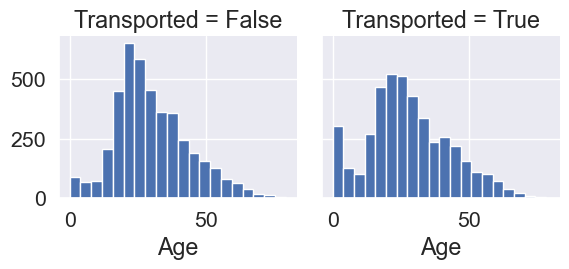

In [49]:
g = sns.FacetGrid(train, col='Transported')
g.map(plt.hist, 'Age', bins=20)

C:\Users\SAN\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


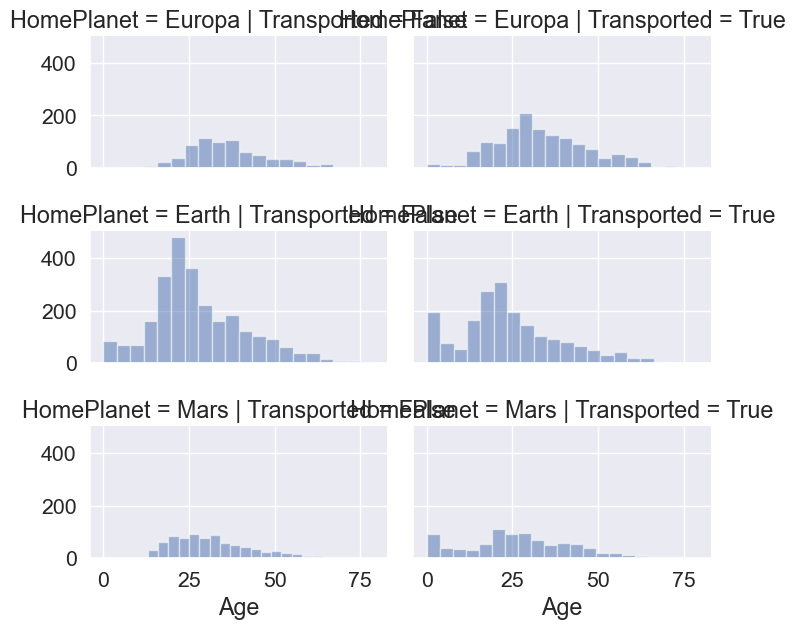

In [61]:
grid = sns.FacetGrid(train, col='Transported', row='HomePlanet', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend();

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

Text(0.5, 0, 'GrpSize')

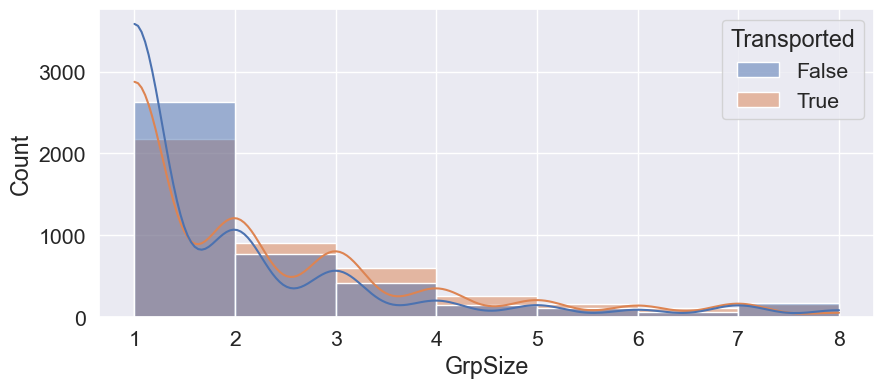

In [62]:
def addGroupSizeFeat (df):
    my_df = df.copy()
    group = my_df.PassengerId.str.split('_', expand=True)[0]
    group_value_counts = group.value_counts()
    my_df['GroupSize'] = group.apply(lambda x: group_value_counts[x]).astype(int)
    return my_df

plt.figure(figsize=(10,4))
sns.histplot(data=addGroupSizeFeat(train), x='GroupSize', hue='Transported', binwidth=1, kde=True)
plt.xlabel('GrpSize')

Text(0.5, 0, 'Is Traveling solo')

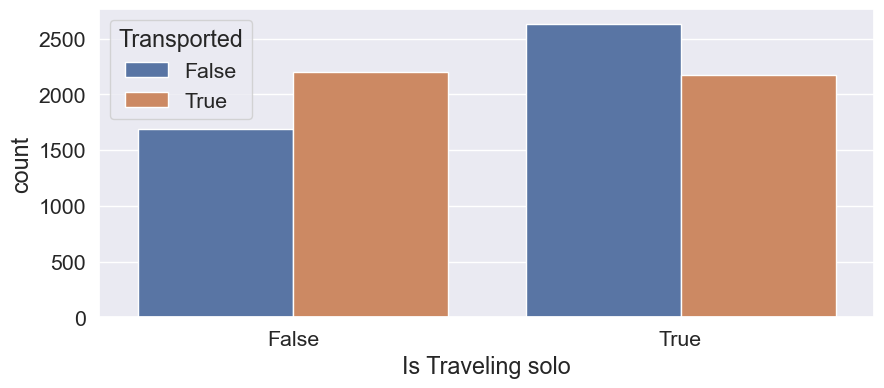

In [63]:
def addIsSoleFeat (df):
    my_df = df.copy()
    group = my_df.PassengerId.str.split('_', expand=True)[0]
    group_value_counts = group.value_counts()
    my_df['IsSole'] = group.apply(lambda x: group_value_counts[x] == 1).astype('category')
    return my_df

plt.figure(figsize=(10,4))
sns.countplot(data=addIsSoleFeat(train), x='IsSole', hue='Transported')
plt.xlabel('Is Traveling solo')

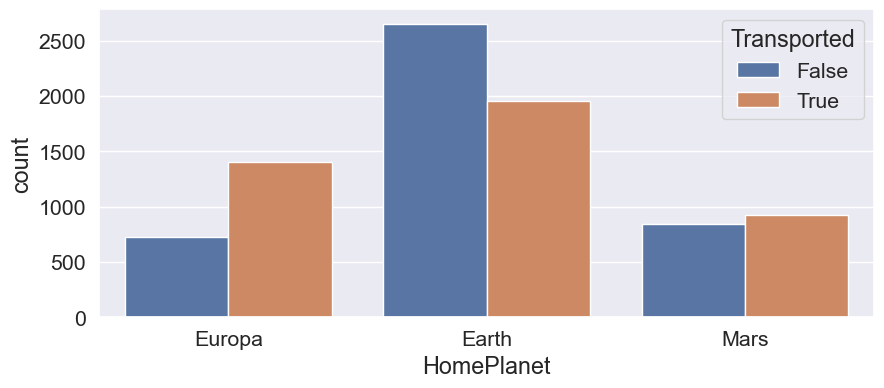

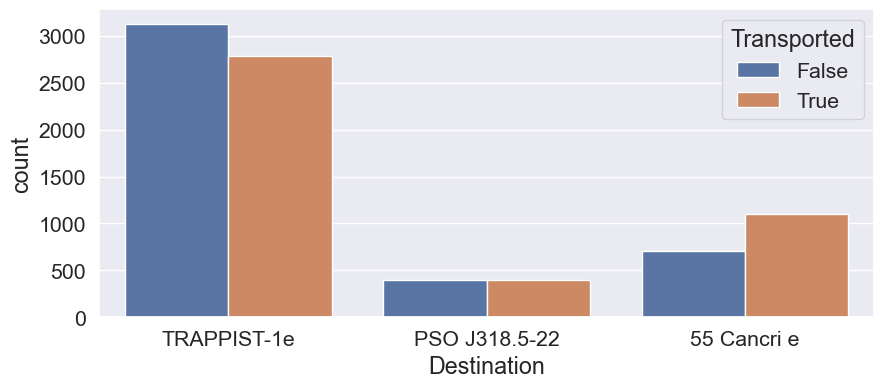

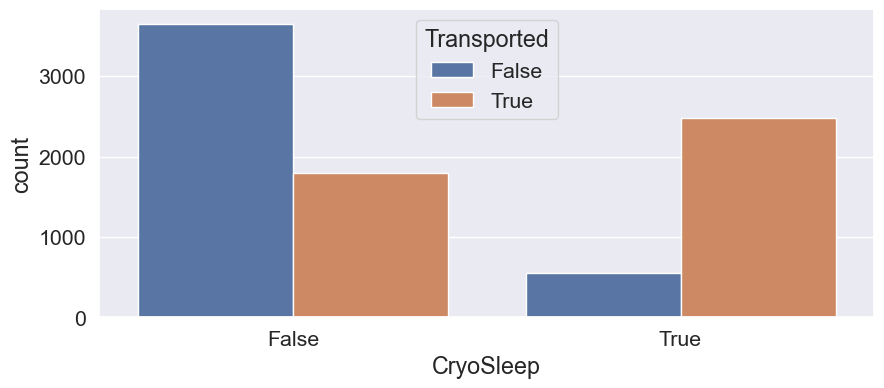

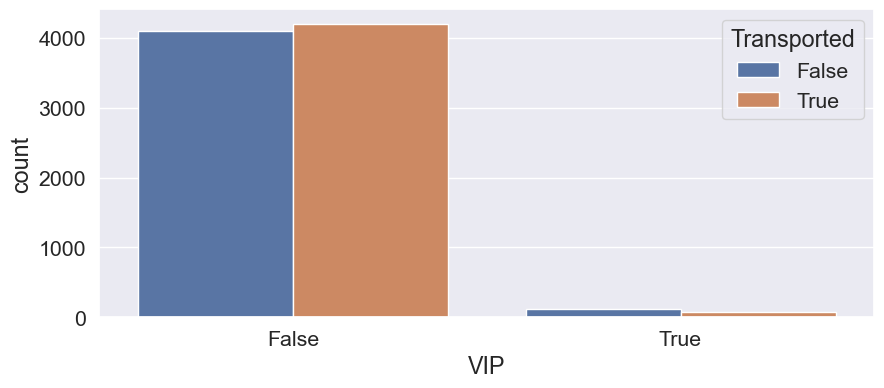

In [9]:
for feat in ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']:  
    plt.figure(figsize=(10,4))
    sns.countplot(data=train, x=feat, hue='Transported')
    plt.xlabel(feat)

In [10]:
train.groupby(['Destination','HomePlanet'])['HomePlanet'].size().unstack()

HomePlanet,Earth,Europa,Mars
Destination,,,
55 Cancri e,690,886,193
PSO J318.5-22,712,19,49
TRAPPIST-1e,3101,1189,1475


### Age

Text(0.5, 0, 'Age')

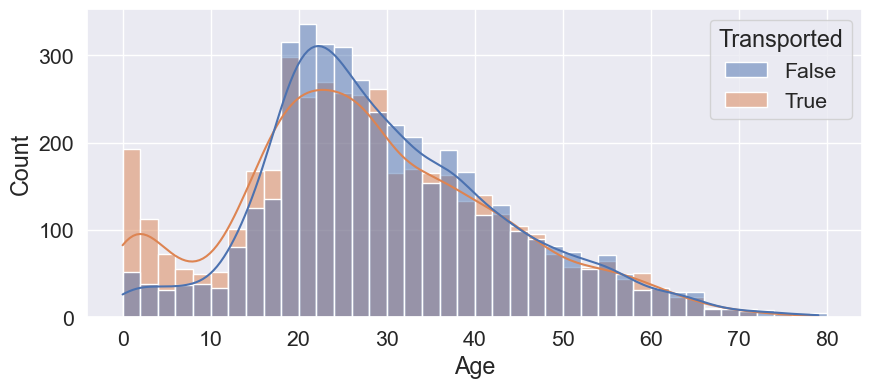

In [64]:
plt.figure(figsize=(10,4))
sns.histplot(data=train, x='Age', hue='Transported', binwidth=2, kde=True)
plt.xlabel('Age')

Text(0.5, 0, 'Is Younger Than 20')

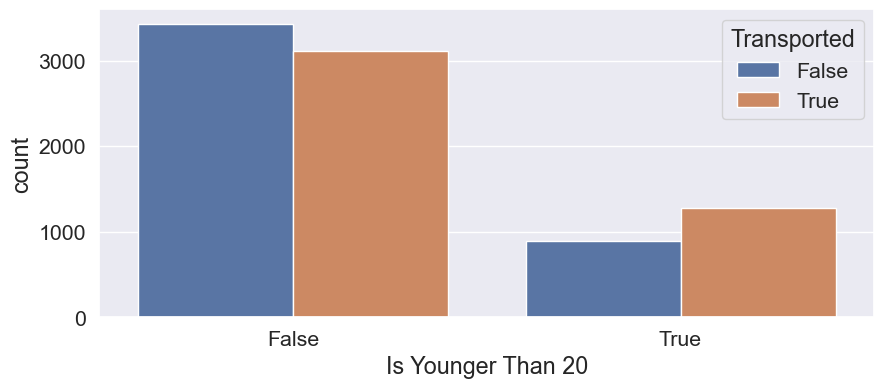

In [12]:
def addYoungerThan20 (df):
    my_df = df.copy()
    my_df['IsYougerThan20'] = my_df['Age'] < 20
    return my_df

plt.figure(figsize=(10,4))
sns.countplot(data=addYoungerThan20(train), x='IsYougerThan20', hue='Transported')
plt.xlabel('Is Younger Than 20')

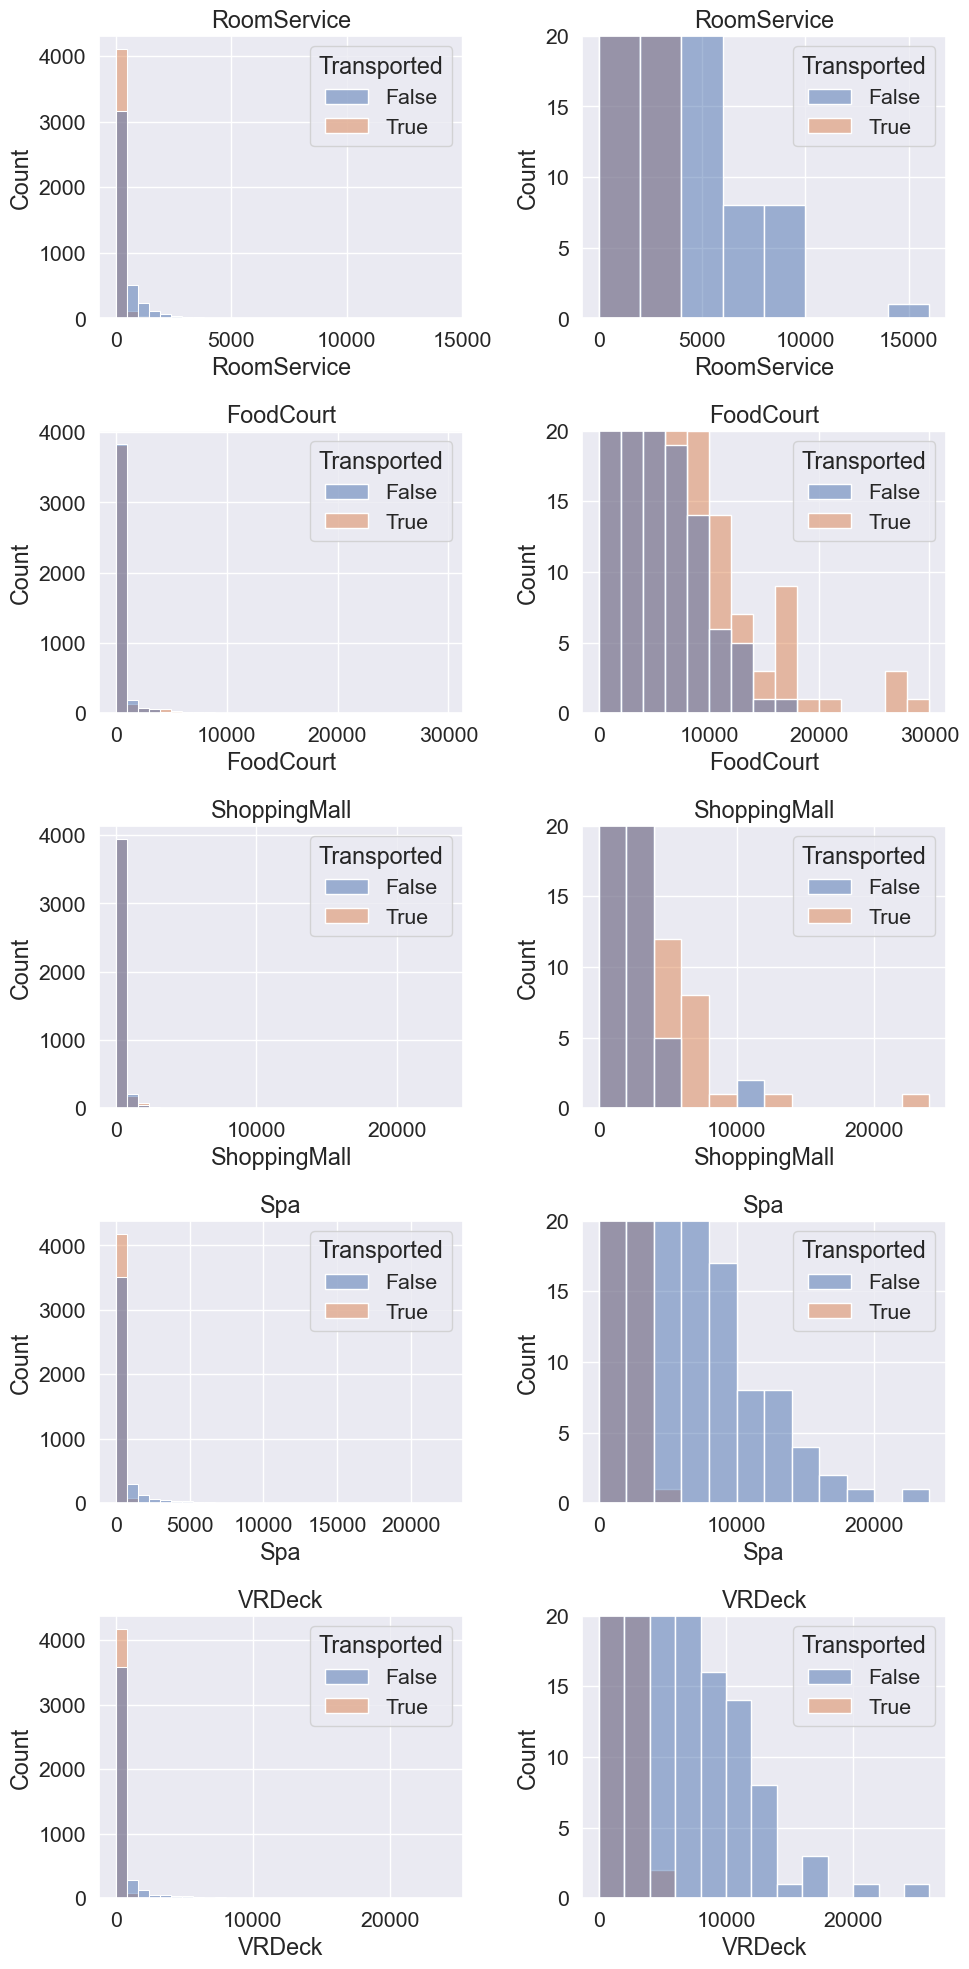

In [13]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, binwidth=2000, kde=False, hue='Transported')
    plt.ylim([0,20])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

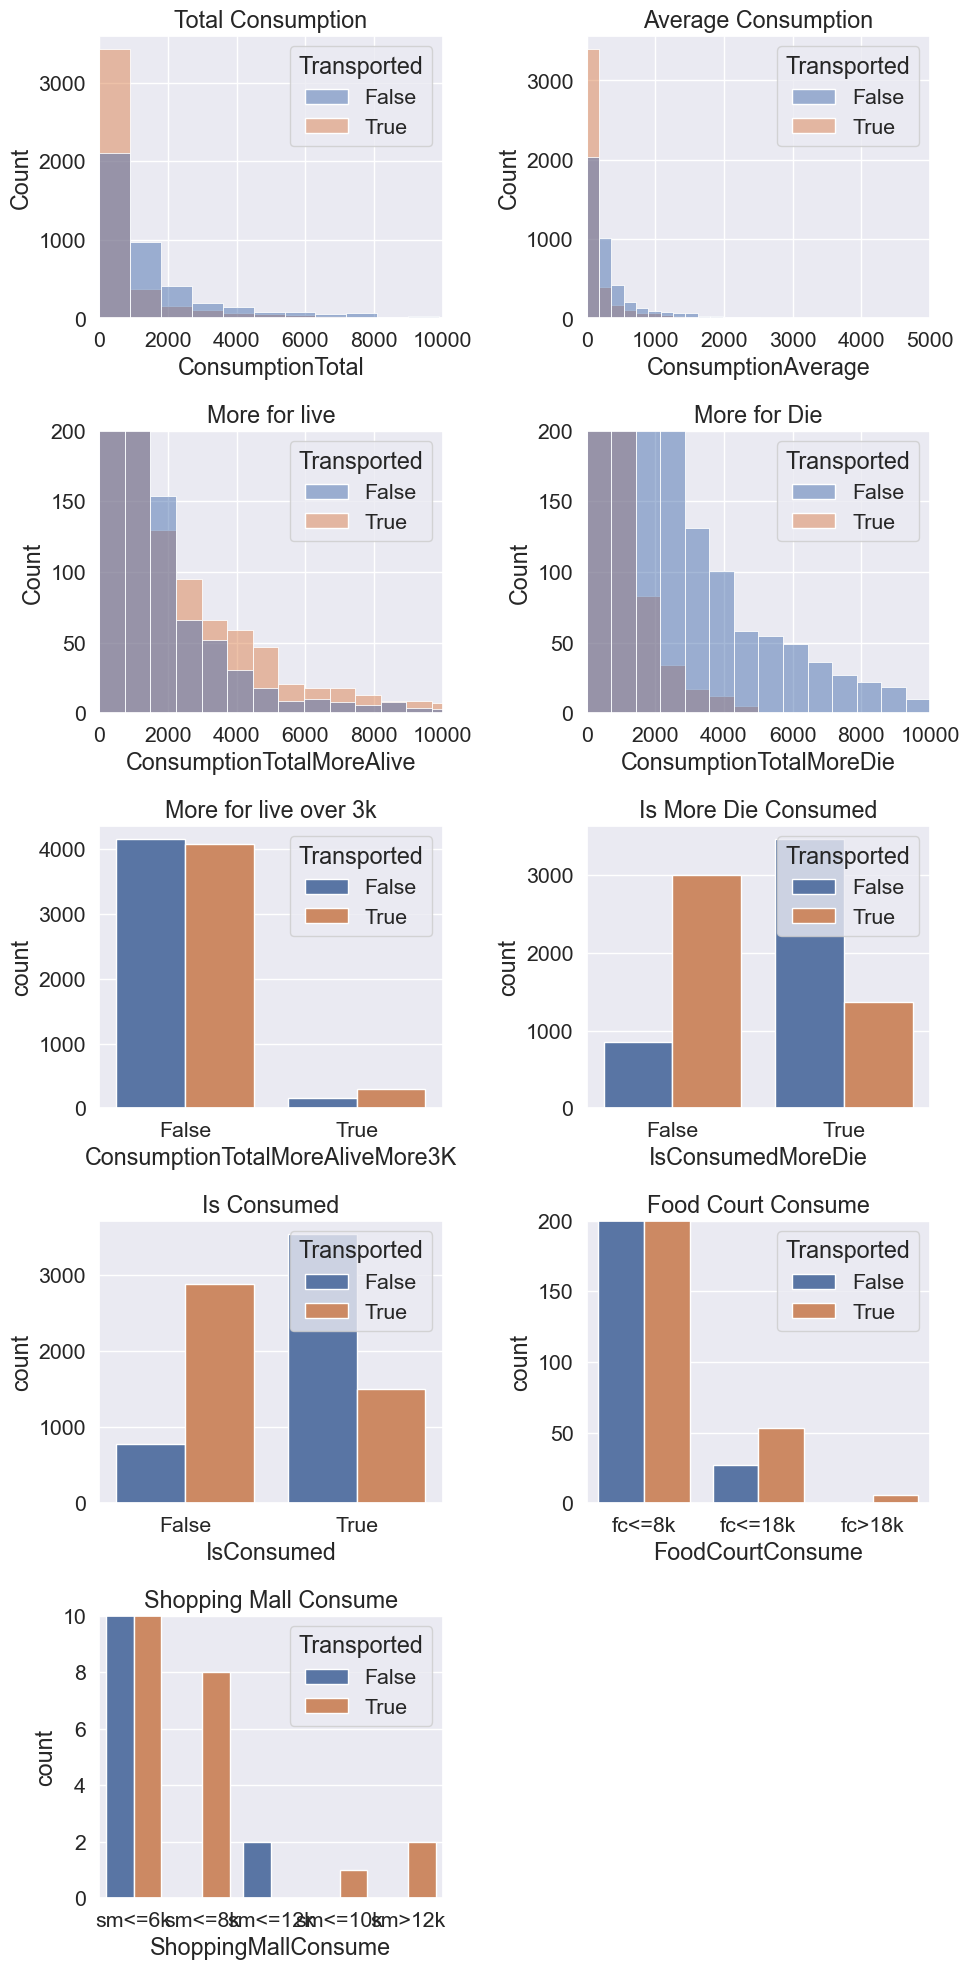

In [14]:
consume_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
consume_more_for_alive = ['FoodCourt', 'ShoppingMall']
consume_more_for_die = ['RoomService', 'Spa', 'VRDeck']

def addTotalConsumption (df):
    my_df = df.copy()
    my_df['ConsumptionTotal'] = my_df.loc[:, consume_feats].sum(axis=1)
    return my_df

def addAverageConsumption (df):
    my_df = df.copy()
    my_df['ConsumptionAverage'] = my_df.loc[:, consume_feats].mean(axis=1)
    return my_df

def addTotalMoreAliveConsumption (df):
    my_df = df.copy()
    my_df['ConsumptionTotalMoreAlive'] = my_df.loc[:, consume_more_for_alive].sum(axis=1)
    return my_df

def addTotalMoreDieConsumption (df):
    my_df = df.copy()
    my_df['ConsumptionTotalMoreDie'] = my_df.loc[:, consume_more_for_die].sum(axis=1)
    return my_df

def addTotalMoreAliveConsumptionOver3k (df):
    my_df = df.copy()
    my_df['ConsumptionTotalMoreAliveMore3K'] = my_df.loc[:, consume_more_for_alive].sum(axis=1) >= 3000
    return my_df

def addIsConsumedMoreDie (df):
    my_df = df.copy()
    my_df['IsConsumedMoreDie'] = my_df.loc[:, consume_more_for_die].sum(axis=1) >0
    return my_df

def addIsConsumed (df):
    my_df = df.copy()
    my_df['IsConsumed'] = my_df.loc[:, consume_feats].sum(axis=1) >0
    return my_df

def addFoodCourtConsumeLevel (df):
    my_df = df.copy()
    my_df.loc[my_df['FoodCourt'] <= 8000, 'FoodCourtConsume'] = 'fc<=8k'
    my_df.loc[(my_df['FoodCourt'] > 8000) & (my_df['FoodCourt'] <= 18000), 'FoodCourtConsume'] = 'fc<=18k'
    my_df.loc[my_df['FoodCourt'] > 18000, 'FoodCourtConsume'] = 'fc>18k'
    return my_df

def addShoppingMallConsumeLevel (df):
    my_df = df.copy()
    my_df.loc[my_df['ShoppingMall'] <= 6000, 'ShoppingMallConsume'] = 'sm<=6k'
    my_df.loc[(my_df['ShoppingMall'] > 6000) & (my_df['ShoppingMall'] <= 8000), 'ShoppingMallConsume'] = 'sm<=8k'
    my_df.loc[(my_df['ShoppingMall'] > 8000) & (my_df['ShoppingMall'] <= 10000), 'ShoppingMallConsume'] = 'sm<=10k'
    my_df.loc[(my_df['ShoppingMall'] > 10000) & (my_df['ShoppingMall'] <= 12000), 'ShoppingMallConsume'] = 'sm<=12k'
    my_df.loc[my_df['ShoppingMall'] > 12000, 'ShoppingMallConsume'] = 'sm>12k'
    return my_df

fig=plt.figure(figsize=(10,20))

ax=fig.add_subplot(5,2,1)
sns.histplot(data=addTotalConsumption(train), axes=ax, bins=40, x='ConsumptionTotal', hue='Transported')
plt.xlim([0,10000])
ax.set_title('Total Consumption')

ax=fig.add_subplot(5,2,2)
sns.histplot(data=addAverageConsumption(train), axes=ax, bins=40, x='ConsumptionAverage', hue='Transported')
plt.xlim([0,5000])
ax.set_title('Average Consumption')

ax=fig.add_subplot(5,2,3)
sns.histplot(data=addTotalMoreAliveConsumption(train), axes=ax, bins=40, x='ConsumptionTotalMoreAlive', hue='Transported')
plt.xlim([0,10000])
plt.ylim([0,200])
ax.set_title('More for live')

ax=fig.add_subplot(5,2,4)
sns.histplot(data=addTotalMoreDieConsumption(train), axes=ax, bins=40, x='ConsumptionTotalMoreDie', hue='Transported')
plt.xlim([0,10000])
plt.ylim([0,200])
ax.set_title('More for Die')

ax=fig.add_subplot(5,2,5)
sns.countplot(data=addTotalMoreAliveConsumptionOver3k(train), axes=ax, x='ConsumptionTotalMoreAliveMore3K', hue='Transported')
ax.set_title('More for live over 3k')

ax=fig.add_subplot(5,2,6)
sns.countplot(data=addIsConsumedMoreDie(train), axes=ax, x='IsConsumedMoreDie', hue='Transported')
ax.set_title('Is More Die Consumed')

ax=fig.add_subplot(5,2,7)
sns.countplot(data=addIsConsumed(train), axes=ax, x='IsConsumed', hue='Transported')
ax.set_title('Is Consumed')

ax=fig.add_subplot(5,2,8)
sns.countplot(data=addFoodCourtConsumeLevel(train), axes=ax, x='FoodCourtConsume', hue='Transported')
plt.ylim([0,200])
ax.set_title('Food Court Consume')

ax=fig.add_subplot(5,2,9)
sns.countplot(data=addShoppingMallConsumeLevel(train), axes=ax, x='ShoppingMallConsume', hue='Transported')
plt.ylim([0,10])
ax.set_title('Shopping Mall Consume')

fig.tight_layout()  # Improves appearance a bit

C:\Users\SAN\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


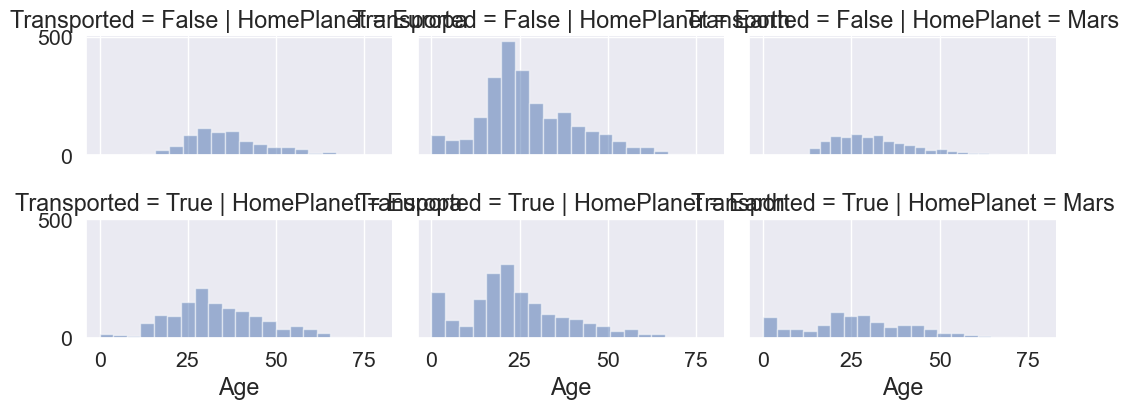

In [67]:
grid = sns.FacetGrid(train, row='Transported', col='HomePlanet', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

max cabin number 1894


Text(0.5, 1.0, 'Cabin Side')

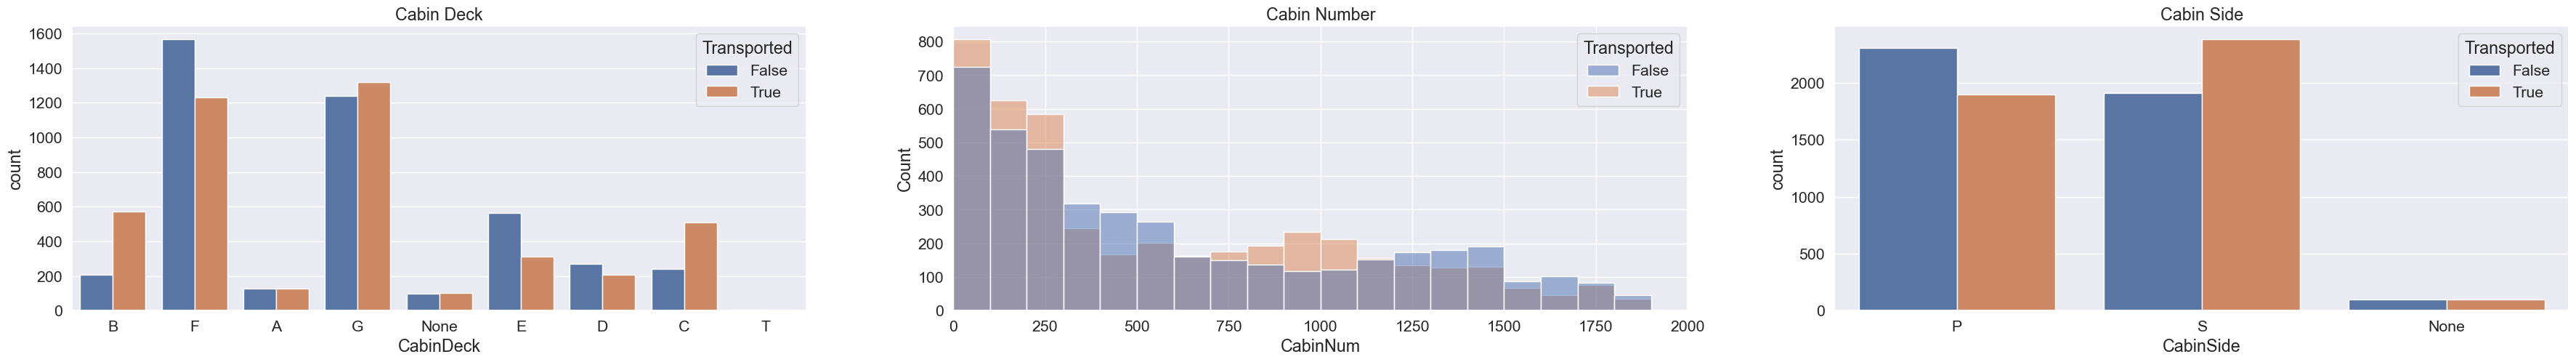

In [15]:
def splitCabinForNewFeatures (df):
    my_df = df.copy()
    split_cabin_df = my_df.Cabin.str.split("/", expand = True)
    my_df['CabinDeck'] = split_cabin_df[0]
    my_df['CabinNum'] = split_cabin_df[1]
    my_df['CabinSide'] = split_cabin_df[2]
    my_df.pop('Cabin')
    return my_df

splitedCabinData = splitCabinForNewFeatures(train)
splitedCabinData['CabinNum'] = splitedCabinData['CabinNum'].fillna(0).astype(int) # only int type can display well in histplot
print('max cabin number {}'.format(splitedCabinData['CabinNum'].max()))

fig=plt.figure(figsize=(60,60))

ax1=fig.add_subplot(10,4,1)
sns.countplot(data=splitedCabinData.fillna('None'), axes=ax1, x='CabinDeck', hue='Transported')
ax1.set_title('Cabin Deck')

ax2=fig.add_subplot(10,4,2)
sns.histplot(data=splitedCabinData, x='CabinNum', binwidth=100, axes=ax2, hue='Transported')
plt.xlim([0,2000])
ax2.set_title('Cabin Number')

ax3=fig.add_subplot(10,4,3)
sns.countplot(data=splitedCabinData.fillna('None'), axes=ax3, x='CabinSide', hue='Transported')
ax3.set_title('Cabin Side')

Text(0.5, 0, 'Cabin Number Group')

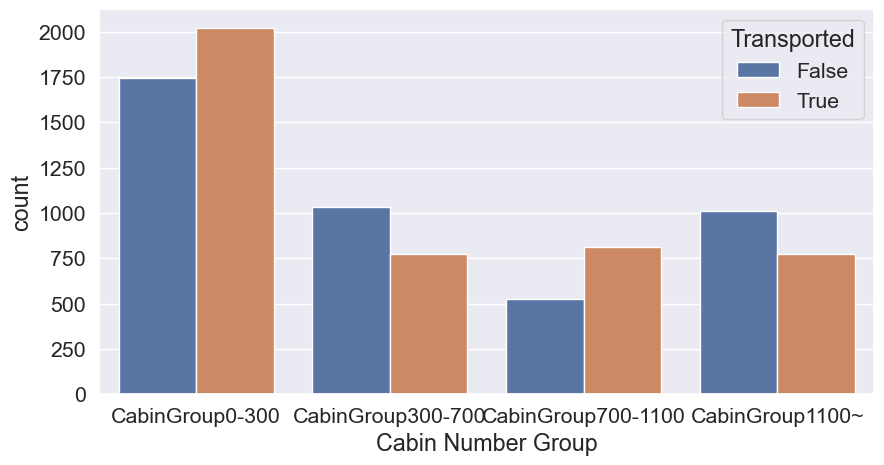

In [16]:
def addGroupCarbinNumber(df):
    my_df = df.copy()
    cabin_num = my_df['CabinNum'].fillna(0).astype(int)
    my_df.loc[cabin_num <= 300, 'CabinNumGroup'] = 'CabinGroup0-300'
    my_df.loc[(cabin_num > 300) & (cabin_num <= 700), 'CabinNumGroup'] = 'CabinGroup300-700'
    my_df.loc[(cabin_num > 700) & (cabin_num <= 1100), 'CabinNumGroup'] = 'CabinGroup700-1100'
    my_df.loc[cabin_num > 1100, 'CabinNumGroup'] = 'CabinGroup1100~'
    return my_df

plt.figure(figsize=(10,5))
sns.countplot(data=addGroupCarbinNumber(splitedCabinData), x='CabinNumGroup', hue='Transported')
plt.xlabel('Cabin Number Group')

### Family Name

Text(0.5, 0, 'Family Size')

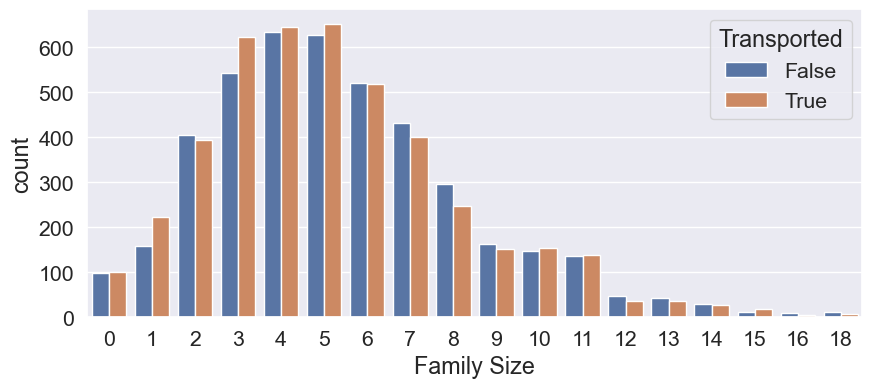

In [17]:
def splitNameToGenerateFamilyName (df):
    my_df = df.copy()
    split_name_df = my_df.Name.str.split(" ", expand = True)
    my_df['FamilyName'] = split_name_df[1]
    my_df['FamilyName'] = my_df['FamilyName'].fillna('Unknown')
    familyNameValueCounts = my_df['FamilyName'].value_counts()
    my_df['FamilySize'] = my_df['FamilyName'].map(lambda name: familyNameValueCounts[name] if name != 'Unknown' else 0)
    my_df.pop('Name')
    return my_df

plt.figure(figsize=(10,4))
sns.countplot(data=splitNameToGenerateFamilyName(train), x='FamilySize', hue='Transported')
plt.xlabel('Family Size')

In [18]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
dtypes: float64(6), object(7)
memory usage: 883.0+ KB


In [19]:
def displayAllCateFeatInfo (df):
    for column in df.columns:
        if (df[column].dtype == 'object'):
            print("column: {} -> {}, unique values: {}".format(column, df[column].unique(), df[column].nunique()))
            
displayAllCateFeatInfo(train_X)

column: PassengerId -> ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'], unique values: 8693
column: HomePlanet -> ['Europa' 'Earth' 'Mars' nan], unique values: 3
column: CryoSleep -> [False True nan], unique values: 2
column: Cabin -> ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'], unique values: 6560
column: Destination -> ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan], unique values: 3
column: VIP -> [False True nan], unique values: 2
column: Name -> ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre'], unique values: 8473


In [20]:
def addAgeGroup (df):
    my_df = df.copy()
    my_df.loc[my_df['Age'] <= 18, 'AgeGroup'] = 'Age0-18'
    my_df.loc[(my_df['Age'] > 18) & (my_df['Age'] <= 26), 'AgeGroup'] = 'Age18-26'
    my_df.loc[(my_df['Age'] > 26) & (my_df['Age'] <= 42), 'AgeGroup'] = 'Age26-42'
    my_df.loc[my_df['Age'] > 42, 'AgeGroup'] = 'Age42~'
    return my_df
    
addAgeGroup(train_X).head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,Age26-42
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,Age18-26
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,Age42~
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,Age26-42
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,Age0-18


In [21]:
def addConsumptionRelatedFeats (df):
    my_df = df.copy()
    my_df = addTotalMoreAliveConsumption(my_df)
    my_df = addTotalMoreDieConsumption(my_df)
    my_df = addIsConsumedMoreDie(my_df)
    my_df = addIsConsumed(my_df)
#     my_df = addTotalMoreAliveConsumptionOver3k(my_df)
    my_df = addFoodCourtConsumeLevel(my_df)
    my_df = addShoppingMallConsumeLevel(my_df)
    return my_df
    
addConsumptionRelatedFeats(train_X).head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,ConsumptionTotalMoreAlive,ConsumptionTotalMoreDie,IsConsumedMoreDie,IsConsumed,FoodCourtConsume,ShoppingMallConsume
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,0.0,False,False,fc<=8k,sm<=6k
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,34.0,702.0,True,True,fc<=8k,sm<=6k
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3576.0,6807.0,True,True,fc<=8k,sm<=6k
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1654.0,3522.0,True,True,fc<=8k,sm<=6k
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,221.0,870.0,True,True,fc<=8k,sm<=6k


In [22]:
def dropColumns (df, feats):
    my_df = df.copy()
    my_df = my_df.drop(columns = feats)
    return my_df

In [23]:
def transformFeatures (df):
    my_df = df.copy()
    my_df = addGroupSizeFeat(my_df)
    my_df = addIsSoleFeat(my_df)
    my_df = splitCabinForNewFeatures(my_df)
    my_df = addGroupCarbinNumber(my_df)
    my_df = splitNameToGenerateFamilyName(my_df)
    my_df = addAgeGroup(my_df)
    my_df = addConsumptionRelatedFeats(my_df)
    my_df = dropColumns(my_df, ["PassengerId", 'VIP'])
    return my_df

In [71]:
transformed_train_X = transformFeatures(train_X)


In [72]:
transformed_train_X.isna().mean(axis=0)

HomePlanet                   0.023122
CryoSleep                    0.024963
Destination                  0.020936
Age                          0.020591
RoomService                  0.020821
FoodCourt                    0.021051
ShoppingMall                 0.023927
Spa                          0.021051
VRDeck                       0.021627
GroupSize                    0.000000
IsSole                       0.000000
CabinDeck                    0.022892
CabinNum                     0.022892
CabinSide                    0.022892
CabinNumGroup                0.000000
FamilyName                   0.000000
FamilySize                   0.000000
AgeGroup                     0.020591
ConsumptionTotalMoreAlive    0.000000
ConsumptionTotalMoreDie      0.000000
IsConsumedMoreDie            0.000000
IsConsumed                   0.000000
FoodCourtConsume             0.021051
ShoppingMallConsume          0.023927
dtype: float64

In [26]:
def getNullInfo(df):
    for column in df.columns:
        print("column: {} -> {}".format(column, df[column].isnull().sum()))
getNullInfo(transformed_train_X)

column: HomePlanet -> 201
column: CryoSleep -> 217
column: Destination -> 182
column: Age -> 179
column: RoomService -> 181
column: FoodCourt -> 183
column: ShoppingMall -> 208
column: Spa -> 183
column: VRDeck -> 188
column: GroupSize -> 0
column: IsSole -> 0
column: CabinDeck -> 199
column: CabinNum -> 199
column: CabinSide -> 199
column: CabinNumGroup -> 0
column: FamilyName -> 0
column: FamilySize -> 0
column: AgeGroup -> 179
column: ConsumptionTotalMoreAlive -> 0
column: ConsumptionTotalMoreDie -> 0
column: IsConsumedMoreDie -> 0
column: IsConsumed -> 0
column: FoodCourtConsume -> 183
column: ShoppingMallConsume -> 208


In [27]:
transformed_train_X.CabinSide.value_counts()

S    4288
P    4206
Name: CabinSide, dtype: int64

In [68]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder



In [69]:
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

In [70]:
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)

In [30]:
def transform_input (df):
    my_df = df.copy()
    my_df = transformFeatures(my_df)
    return my_df

In [31]:
feat_transformed_train_X = transform_input(train_X)
feat_transformed_train_X.shape

(8693, 24)

In [32]:
from sklearn.compose import ColumnTransformer

num_feats = feat_transformed_train_X.select_dtypes(include='number').columns
cat_feats = feat_transformed_train_X.select_dtypes(exclude='number').columns

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_feats),
        ("categorical", categorical_pipeline, cat_feats),
    ]
)

ready_train_X = full_processor.fit_transform(feat_transformed_train_X)
ready_train_X.shape

(8693, 4085)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
ready_train_y = SimpleImputer(strategy="most_frequent").fit_transform(train_Y.values.reshape(-1, 1).astype(int))

X_split_train, X_split_test, y_split_train, y_split_test = train_test_split(
    ready_train_X,
    ready_train_y,
    stratify=ready_train_y, # so the split contains the same proportion of categories in both sets
    random_state=1121218
)

In [35]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(X_split_train, y_split_train.ravel())
preds = clf.predict(X_split_test)
accuracy_score(preds, y_split_test)

0.8196872125114996

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [37]:
lgb_model = LGBMClassifier(objective="binary")

In [38]:
ready_train_y = SimpleImputer(strategy="most_frequent").fit_transform(train_Y.values.reshape(-1, 1).astype(int))

param_grid = {
    'n_estimators': [100, 200, 300],
    "max_depth": [6, 8, 12],
    "learning_rate": [0.01, 0.02, 0.05]
}

grid_cv = GridSearchCV(
    lgb_model,
    param_grid,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=5, shuffle=True),
    scoring="roc_auc",
    verbose=2,
    refit=True
)

_ = grid_cv.fit(ready_train_X, ready_train_y.ravel())

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [39]:
grid_cv.best_score_, grid_cv.best_params_

(0.9018121578649396,
 {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100})

In [40]:
clf = LGBMClassifier(
    **grid_cv.best_params_,
    objective="binary",
)

ready_train_y = SimpleImputer(strategy="most_frequent").fit_transform(train_Y.values.reshape(-1, 1).astype(int))
clf.fit(ready_train_X, ready_train_y.ravel())

LGBMClassifier(learning_rate=0.05, max_depth=6, objective='binary')

In [42]:
feat_transformed_test = transform_input(test)
ready_test = full_processor.transform(feat_transformed_test)
ready_test.shape

(4277, 4085)

In [43]:
predection = clf.predict(ready_test).astype(bool)
my_submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Transported': predection})
my_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [44]:
my_submission.to_csv('kagglesubmissionfilefinal.csv', index=False)